In [1]:
from src import data_processing
from src import paths
import yaml
import pandas as pd
import statsmodels.api as sm
from src.utils import view_statsmodels_summaries
from src.utils import create_interactive_viewer

import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np 
import os

In [2]:
with open('../src/configs/config.yaml', 'r') as f:
    full_config = yaml.safe_load(f)

final_df = data_processing.get_analysis_ready_df(full_config=full_config, use_cache = False, force_refresh = False)
og_df = pd.read_parquet(paths.RAW_DATA_DIR/'BARTER_DEALS.parquet')


Loading files for analysis barter_deals
🐢 Running full processing pipeline...


ValueError: No objects to concatenate

In [3]:
final_df

applicants_applications_count  \
0                                 39   
1                                 39   
2                                 39   
3                                 39   
4                                 39   
...                              ...   
28025                             10   
28026                             10   
28028                             10   
28029                             10   
28030                             10   

                                           content_types  \
0      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
1      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
2      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
3      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
4      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
...                                                  ...   
28025  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28026  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28028  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28029  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28030  [{'id': 41, 'name': 'Activities', 'slug': 'per...   

                                    deal_id  \
0      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
1      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
2      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
3      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
4      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
...                                     ...   
28025  0198f665-cc50-00c8-1c06-95043e02c7d4   
28026  0198f665-cc50-00c8-1c06-95043e02c7d4   
28028  0198f665-cc50-00c8-1c06-95043e02c7d4   
28029  0198f665-cc50-00c8-1c06-95043e02c7d4   
28030  0198f665-cc50-00c8-1c06-95043e02c7d4   

                                              main_image  \
0      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
1      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
2      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
3      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
4      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
...                                                  ...   
28025  uploads/deals/0198f665-a7d4-ffff-1c2a-1790b7b0...   
28026  uploads/deals/0198f665-a7d4-ffff-1c2a-1790b7b0...   
28028  uploads/deals/0198f665-a7d4-ffff-1c2a-1790b7b0...   
28029  uploads/deals/0198f665-a7d4-ffff-1c2a-1790b7b0...   
28030  uploads/deals/0198f665-a7d4-ffff-1c2a-1790b7b0...   

       min_social_media_followers deal_tags                 live_since  \
0                            2500      None 2025-05-20 15:21:28.249567   
1                            2500      None 2025-05-20 15:21:28.249567   
2                            2500      None 2025-05-20 15:21:28.249567   
3                            2500      None 2025-05-20 15:21:28.249567   
4                            2500      None 2025-05-20 15:21:28.249567   
...                           ...       ...                        ...   
28025                        1500      None 2025-08-29 15:15:23.491474   
28026                        1500      None 2025-08-29 15:15:23.491474   
28028                        1500      None 2025-08-29 15:15:23.491474   
28029                        1500      None 2025-08-29 15:15:23.491474   
28030                        1500      None 2025-08-29 15:15:23.491474   

                      created_at                 updated_at deleted_at  ...  \
0     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
1     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
2     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
3     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
4     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
...                          ...                        ...        ...  ...   
28025 2025-08-29 15:15:23.344105 2025-10-28 11:03:36.651572        NaT  ...  

In [4]:
active_analysis = full_config['active_analysis']
model_vars = full_config['analyses'][active_analysis]['model_vars']
experimental_groups = model_vars['experimental_groups']

In [5]:
final_df.groupby(experimental_groups).count()

applicants_applications_count  \
model_name                  prompt_id  assistant_prefix                                  
Qwen/Qwen3-4B-Instruct-2507 8770599519                                            2253   
                                       Rating:                                    2278   
                            f686fa3259                                            2263   
                                       Rating:                                    2274   
google/gemma-3-1b-it        8770599519                                            2253   
                                       Rating:                                    2278   
                            f686fa3259                                            2263   
                                       Rating:                                    2274   
google/gemma-3-4b-it        8770599519                                            2253   
                                       Rating:                                    2278   
                            f686fa3259                                            2263   
                                       Rating:                                    2274   

                                                         content_types  \
model_name                  prompt_id  assistant_prefix                  
Qwen/Qwen3-4B-Instruct-2507 8770599519                            2248   
                                       Rating:                    2273   
                            f686fa3259                            2258   
                                       Rating:                    2270   
google/gemma-3-1b-it        8770599519                            2248   
                                       Rating:                    2273   
                            f686fa3259                            2258   
                                       Rating:                    2270   
google/gemma-3-4b-it        8770599519                            2248   
                                       Rating:                    2273   
                            f686fa3259                            2258   
                                       Rating:                    2270   

                                                         deal_id  main_image  \
model_name                  prompt_id  assistant_prefix                        
Qwen/Qwen3-4B-Instruct-2507 8770599519                      2253        2253   
                                       Rating:              2278        2278   
                            f686fa3259                      2263        2263   
                                       Rating:              2274        2274   
google/gemma-3-1b-it        8770599519                      2253        2253   
                                       Rating:              2278        2278   
                            f686fa3259                      2263        2263   
                                       Rating:              2274        2274   
google/gemma-3-4b-it        8770599519                      2253        2253   
                                       Rating:              2278        2278   
                            f686fa3259                      2263        2263   
                                       Rating:              2274        2274   

                                                         min_social_media_followers  \
model_name                  prompt_id  assistant_prefix                               
Qwen/Qwen3-4B-Instruct-2507 8770599519                                         2253   
                                       Rating:                                 2278   
                            f686fa3259                                         2263   
                                       Rating:                                 2274   
google/gemma-3-1b-it        8770599519                                         2253   
                             

In [6]:
df = final_df.copy()

# Data cleaning

In [7]:
og_df.isna().sum()

applicants_applications_count       0
content_types                      11
deal_id                             0
main_image                          0
min_social_media_followers          0
deal_tags                        5111
live_since                        908
created_at                          0
updated_at                          0
deleted_at                       4426
id                                  0
partner_id                          0
deal_title                          0
deal_text                           0
creators_requirement                0
hash_tags                           0
status                              0
deal_value                         72
go_live_at                        252
live_until                       4419
deal_type                           0
images                             31
business_tone                    5111
ai_enhanced                         0
accepts_international               0
accepted_countries                  0
social_requi

In [8]:
b = og_df[~og_df.deleted_at.isna()]
b

applicants_applications_count  \
20                                0   
23                                0   
24                               65   
33                                6   
43                                0   
...                             ...   
3752                             10   
3768                             16   
3769                              4   
3806                             16   
3817                              1   

                                          content_types  \
20     [{'id': 21, 'name': 'Fashion', 'slug': 'Dress'}]   
23     [{'id': 21, 'name': 'Fashion', 'slug': 'Dress'}]   
24    [{'id': 23, 'name': 'Food', 'slug': 'Pizza'}, ...   
33        [{'id': 23, 'name': 'Food', 'slug': 'Pizza'}]   
43     [{'id': 21, 'name': 'Fashion', 'slug': 'Dress'}]   
...                                                 ...   
3752  [{'id': 39, 'name': 'Experiences', 'slug': 'Te...   
3768  [{'id': 39, 'name': 'Experiences', 'slug': 'Te...   
3769  [{'id': 29, 'name': 'UGC', 'slug': 'Film-Strip...   
3806  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
3817   [{'id': 21, 'name': 'Fashion', 'slug': 'Dress'}]   

                                   deal_id  \
20    0196cf30-3d9e-00c8-45de-a6091919cc67   
23    0196cf35-c5d6-00c8-4d97-bbfef60b2cf5   
24    019689e5-c8c2-00c8-79f3-9992362edeea   
33    019689e3-770b-00c8-d2ee-83252084a97a   
43    019689e2-4cfe-00c8-3431-cc40ca55bde0   
...                                    ...   
3752  019689e5-5467-00c8-2313-73cc8fa9d396   
3768  019689e5-3460-00c8-9c3e-70c3c96c58a8   
3769  019689e5-17b9-00c8-b740-b33d1546b99b   
3806  019689e5-c484-00c8-1796-a40189fb5d24   
3817  019689e6-0ab3-00c8-4fb4-8fd8aab6849c   

                                             main_image  \
20                                                        
23                                                        
24    uploads/deals/019689e5-c976-ffff-edd8-529b3e62...   
33    uploads/deals/019689e3-77aa-ffff-9af7-e4cde670...   
43    uploads/deals/019689e2-4db3-ffff-cf7e-29abc068...   
...                                                 ...   
3752  uploads/deals/019689e5-550c-ffff-e4ca-827b5ab9...   
3768  uploads/deals/019689e5-3501-ffff-7828-d91bff66...   
3769  uploads/deals/019689e5-1e87-ffff-c2b5-c4ba27f1...   
3806  uploads/deals/019689e5-c647-ffff-4069-085db271...   
3817  uploads/deals/019689e6-0b80-ffff-00e7-9f486204...   

      min_social_media_followers deal_tags live_since  \
20                          1500      None        NaT   
23                          2500      None        NaT   
24                          5000      None        NaT   
33                          2500      None        NaT   
43                          5000      None        NaT   
...                          ...       ...        ...   
3752                        5000      None        NaT   
3768                        5000      None        NaT   
3769                        5000      None        NaT   
3806                        2500      None        NaT   
3817                        5000      None        NaT   

                     created_at                 updated_at  \
20   2025-05-14 14:26:07.390204 2025-05-14 14:38:34.607315   
23   2025-05-14 14:32:09.942486 2025-05-14 14:32:15.868080   
24   2023-11-22 12:13:25.712323 2025-05-01 03:31:00.674606   
33   2024-02-16 13:13:22.821687 2025-05-01 03:28:28.371244   
43   2023-12-18 08:49:13.007895 2025-05-01 03:27:12.084951   
...                         ...                        ...   
3752 2024-03-28 09:11:35.076057 2025-05-01 03:30:30.900280   
3768 2024-03-23 18:20:29.924824 2025-05-01 03:30:22.297392   
3769 2024-10-14 09:44:45.892968 2025-05-01 03:30:16.674483   
3806 2024-10-21 12:55:38.086083 2025-05-01 03:30:59.492880   
3817 2023-11-29 14:23:16.720593 2025-05-01 03:31:18.001243   

                           deleted_at  ... legacy_id  tags gender  \
20   2025-05-15 09:33:30.588079+00:00  ...       NaN  None   None  

I have noticed that sometimes there is a big discrepancy between the nr. of people that registered in the first 7 days and the total number of applicants. This might have something to do with the way that I compute the nr. of apps after 7 days. I will need to check for specific deals where $diff$ is big, and see why I find few or no applications after 7 days. 

In [9]:
og_df['diff'] = og_df['applicants_applications_count'] - og_df['apps_after_7_days']
bigdiff = og_df[og_df['diff'] > 200]
bigdiff

applicants_applications_count  \
34                              382   
79                              668   
81                              377   
98                              462   
108                             540   
...                             ...   
4684                            758   
4941                            411   
4950                            332   
4955                            665   
4957                            444   

                                          content_types  \
34    [{'id': 39, 'name': 'Experiences', 'slug': 'Te...   
79    [{'id': 38, 'name': 'Music', 'slug': 'Music-No...   
81    [{'id': 29, 'name': 'UGC', 'slug': 'Film-Strip...   
98    [{'id': 29, 'name': 'UGC', 'slug': 'Film-Strip...   
108       [{'id': 23, 'name': 'Food', 'slug': 'Pizza'}]   
...                                                 ...   
4684  [{'id': 29, 'name': 'UGC', 'slug': 'Film-Strip...   
4941  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
4950  [{'id': 22, 'name': 'Travel', 'slug': 'Airplan...   
4955  [{'id': 39, 'name': 'Experiences', 'slug': 'Te...   
4957  [{'id': 39, 'name': 'Experiences', 'slug': 'Te...   

                                   deal_id  \
34    019689e5-5a44-00c8-34b6-521692d697e8   
79    019689e5-7391-00c8-df2d-4b1be8c26296   
81    019689e4-eb07-00c8-3427-16787d41c471   
98    019689e4-ef20-00c8-da5f-24f0ab38d2ba   
108   019689e5-8c20-00c8-6af0-91f6bc745e40   
...                                    ...   
4684  019689e6-6487-00c8-17e9-62570a38ad86   
4941  019689e4-6933-00c8-d264-203a3d674556   
4950  019689e2-7d1c-00c8-8ca0-5700ca5322f9   
4955  019689e3-27f3-00c8-658b-cac4b6a5e165   
4957  019689e4-6d22-00c8-433a-27595ff22c56   

                                             main_image  \
34    uploads/deals/019689e5-5afd-ffff-cbf7-5c75751a...   
79    uploads/deals/019689e5-7437-ffff-c6ae-d33f6c7f...   
81    uploads/deals/019689e4-ec3e-ffff-a1ed-509372eb...   
98    uploads/deals/019689e4-f038-ffff-ba91-38ba1802...   
108   uploads/deals/019689e5-8c82-ffff-05ca-3cfd45da...   
...                                                 ...   
4684  uploads/deals/019689e6-65ad-ffff-06e6-7b7bb6dd...   
4941  uploads/deals/019689e4-69e5-ffff-7dcb-43d7bf4f...   
4950  uploads/deals/019689e2-7dc8-ffff-f351-a25215f6...   
4955  uploads/deals/019689e3-28e3-ffff-fedb-a326aa6f...   
4957  uploads/deals/019689e4-6e29-ffff-5fd1-b9cbadc0...   

      min_social_media_followers deal_tags                 live_since  \
34                          2500      None 2023-11-06 19:01:40.630849   
79                          2500      None 2024-04-03 08:51:20.713500   
81                          5000      None 2025-01-16 10:26:27.549317   
98                          2500      None 2024-10-11 21:50:11.868064   
108                         5000      None 2024-04-04 15:42:55.867443   
...                          ...       ...                        ...   
4684                        2500      None 2025-02-14 10:26:57.293626   
4941                        2500      None 2024-03-12 10:22:32.876830   
4950                        2500      None 2024-11-24 10:56:46.807379   
4955                        2500      None 2024-12-04 13:48:28.961533   
4957                        5000      None 2024-03-12 15:12:50.022678   

                     created_at                 updated_at deleted_at  ...  \
34   2023-11-06 19:01:40.630849 2025-05-01 03:30:32.010040        NaT  ...   
79   2024-04-03 08:51:20.713500 2025-06-30 09:34:41.008144        NaT  ...   
81   2025-01-16 10:26:27.549317 2025-05-01 03:30:03.775698        NaT  ...   
98   2024-10-11 21:50:11.868064 2025-05-01 03:30:04.796789        NaT  ...   
108  2024-04-04 15:42:55.867443 2025-05-01 03:30:44.708708        NaT  ...   
...                         ...                        ...        ...  ...   
4684 2025-02-14 10:26:57.293626 2025-09-15 04:00:06.952349        NaT  ...   
4941 2024-03-12 10:22:32.876830 2025-10-28 10:54:52.068103       

In [10]:
a = og_df[og_df['live_since'].isna()]

In [11]:
a.isna().sum()

applicants_applications_count      0
content_types                     10
deal_id                            0
main_image                         0
min_social_media_followers         0
deal_tags                        908
live_since                       908
created_at                         0
updated_at                         0
deleted_at                       226
id                                 0
partner_id                         0
deal_title                         0
deal_text                          0
creators_requirement               0
hash_tags                          0
status                             0
deal_value                         5
go_live_at                       252
live_until                       847
deal_type                          0
images                            31
business_tone                    908
ai_enhanced                        0
accepts_international              0
accepted_countries                 0
social_requirement_type_id        19
p

In [12]:
df.isna().sum()

applicants_applications_count        0
content_types                       57
deal_id                              0
main_image                           0
min_social_media_followers           0
deal_tags                        27204
live_since                        3936
created_at                           0
updated_at                           0
deleted_at                       24504
id                                   0
partner_id                           0
deal_title                           0
deal_text                            0
creators_requirement                 0
hash_tags                            0
status                               0
deal_value                         153
go_live_at                        1524
live_until                       23877
deal_type                            0
images                             144
business_tone                    27204
ai_enhanced                          0
accepts_international                0
accepted_countries       

In [13]:
# Drop NA for which there is no model name (for some reason some outputs generated logits but no metadata, TODO: check why)
df = df.dropna(subset = ['model_name'])

In [14]:
df

applicants_applications_count  \
0                                 39   
1                                 39   
2                                 39   
3                                 39   
4                                 39   
...                              ...   
28025                             10   
28026                             10   
28028                             10   
28029                             10   
28030                             10   

                                           content_types  \
0      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
1      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
2      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
3      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
4      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
...                                                  ...   
28025  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28026  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28028  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28029  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28030  [{'id': 41, 'name': 'Activities', 'slug': 'per...   

                                    deal_id  \
0      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
1      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
2      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
3      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
4      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
...                                     ...   
28025  0198f665-cc50-00c8-1c06-95043e02c7d4   
28026  0198f665-cc50-00c8-1c06-95043e02c7d4   
28028  0198f665-cc50-00c8-1c06-95043e02c7d4   
28029  0198f665-cc50-00c8-1c06-95043e02c7d4   
28030  0198f665-cc50-00c8-1c06-95043e02c7d4   

                                              main_image  \
0      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
1      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
2      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
3      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
4      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
...                                                  ...   
28025  uploads/deals/0198f665-a7d4-ffff-1c2a-1790b7b0...   
28026  uploads/deals/0198f665-a7d4-ffff-1c2a-1790b7b0...   
28028  uploads/deals/0198f665-a7d4-ffff-1c2a-1790b7b0...   
28029  uploads/deals/0198f665-a7d4-ffff-1c2a-1790b7b0...   
28030  uploads/deals/0198f665-a7d4-ffff-1c2a-1790b7b0...   

       min_social_media_followers deal_tags                 live_since  \
0                            2500      None 2025-05-20 15:21:28.249567   
1                            2500      None 2025-05-20 15:21:28.249567   
2                            2500      None 2025-05-20 15:21:28.249567   
3                            2500      None 2025-05-20 15:21:28.249567   
4                            2500      None 2025-05-20 15:21:28.249567   
...                           ...       ...                        ...   
28025                        1500      None 2025-08-29 15:15:23.491474   
28026                        1500      None 2025-08-29 15:15:23.491474   
28028                        1500      None 2025-08-29 15:15:23.491474   
28029                        1500      None 2025-08-29 15:15:23.491474   
28030                        1500      None 2025-08-29 15:15:23.491474   

                      created_at                 updated_at deleted_at  ...  \
0     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
1     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
2     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
3     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
4     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
...                          ...                        ...        ...  ...   
28025 2025-08-29 15:15:23.344105 2025-10-28 11:03:36.651572        NaT  ...  

In [15]:
print(len(df))
df = df[['test' not in x.lower() for x in df['deal_text']]]
print(len(df))
df = df[['test' not in x.lower() for x in df['deal_title']]]
print(len(df))

27204
25176
24801


In [16]:
print(len(df))
df = df[~df['content_types'].isna()]
print(len(df))

24801
24744


# EDA

In [17]:
# (Assuming 'df' is your DataFrame)

# 1. Define the keys you will group by
my_group_keys = ['model_name', 'mode_rating', 'prompt_id', 'assistant_prefix']

# 2. Create your dictionary using these keys
rating_dict = {
    k: v[['deal_id', 'deal_title', 'deal_text', 'model_name', 'mean_rating', 'applicants_applications_count', 'apps_after_7_days']]
    for k, v in df.groupby(my_group_keys)
}

# 3. Call the viewer, passing the *same list*
create_interactive_viewer(rating_dict, my_group_keys)

--- Interactive DataFrame Viewer ---


deal_id  \
1460   019689e5-95a1-00c8-9b7c-153878e259f6   
2756   019689e2-639f-00c8-8cc0-63a1af7916c4   
5120   019952a1-008f-00c8-16b5-1042edc56e7c   
5516   019689e2-c46a-00c8-661a-d124bea0b83f   
5792   019689e3-5959-00c8-6f15-beacb0f3eb7a   
6764   019928b5-2108-00c8-4267-2f825684765f   
7844   019689e4-244e-00c8-c8d9-9537ab86fe1b   
8324   01991029-b0f3-00c8-4fd9-26a9d18ebb21   
8552   019689e2-d61b-00c8-34bb-dc801157b894   
9752   019689e3-58ed-00c8-0fb2-0e62f89bf486   
10304  019689e3-6833-00c8-f96e-79918f394224   
13724  019689e2-5082-00c8-20cb-925ae1617690   
14060  019689e2-7b0d-00c8-7fa6-e73d1fd29ccd   
15440  019689e4-1a96-00c8-9c06-a8b81a7d3272   
16376  019909d6-9108-00c8-96c1-bdd3fe02a723   
16460  019909e1-3a89-00c8-5310-1a03e78ea0e8   
16616  01990a0a-9fd7-00c8-e858-006db82d65a8   
18248  019689e4-55b8-00c8-e758-36a3fe17d11d   
19640  019689e4-7f79-00c8-3151-603affc25947   
20192  019689e4-2cf5-00c8-57ff-80334a3c6d8d   
20624  019689e6-3fad-00c8-19b3-d0ad37537a75   
22832  0197042c-7334-00c8-00be-8e2442f8f70b   
26888  019689e4-4edf-00c8-b2af-bf257ba081dd   
26996  019689e4-5291-00c8-e72a-0325d4af4b31   
27116  019689e2-548c-00c8-98c1-3df87e364c40   

                                              deal_title  \
1460                               Celia Co-working pass   
2756                                             Black 🖤   
5120                                     feazzplo;v zepl   
5516                                                   d   
5792                                       Cocktail Time   
6764                                            fzefzefz   
7844   Promotie Hotel Schaepkens. Doelgroep: familie ...   
8324                                  multiple locations   
8552                                       FONDUE FOR 2    
9752                                             Content   
10304                                               Noov   
13724                                         Event cool   
14060                                  BUNS FOR 2 TO GO!   
15440            Anti blaf trainingshalsband voor honden   
16376                                   freeplan go live   
16460                               freeplan go live2222   
16616                                        another one   
18248                                              sdvds   
19640                                              hgfds   
20192                                 zachtbeddengoed.nl   
20624                                          Event 201   
22832                    Ontvang een GRATIS kledingstuk!   
26888                                                 ,,   
26996                                              USB C   
27116                                           xxxxxxxx   

                                               deal_text  \
1460                              *** Deal is Closed ***   
2756                                                  👌🤏   
5120                                          pekfopzkep   
5516                                                  fg   
5792                        2 x 2 COCKTAILS VAN DE KAART   
6764                                          fzefzefzfe   
7844                                                   .   
8324                                  multiple locations   
8552                                              Fondue   
9752                                              dfdfdf   
10304                                                  -   
13724                                    need to do cool   
14060                                                  -   
15440  Anti blafband met afstandsbediening om honden ...   
16376   freeplan go livefreeplan go livefreeplan go live   
16460   freeplan go livefreeplan go livefreeplan go live   
16616                                        another one   
18248                                              dfssd   
19640                                             dsfdfs   
20192                            beddengoed tgv 200 

In [18]:
df.groupby(experimental_groups)['mean_rating'].mean()

model_name                   prompt_id   assistant_prefix
Qwen/Qwen3-4B-Instruct-2507  8770599519                      3.235854
                                         Rating:             3.439902
                             f686fa3259                      3.525845
                                         Rating:             3.596224
google/gemma-3-1b-it         8770599519                      3.198694
                                         Rating:             3.608700
                             f686fa3259                      4.822142
                                         Rating:             4.551452
google/gemma-3-4b-it         8770599519                      3.251806
                                         Rating:             3.261351
                             f686fa3259                      3.408940
                                         Rating:             3.388688
Name: mean_rating, dtype: float32

First we plot the nr. of observations per rating (mode). A good evaluation model requires good separation. 

- The assistant prefix helps Gemma a lot for the naive prompt, a bit for the BARS prompt.
- The assistant prefix leads to better separation for Qwen with the naive prompt. 
- The BARS prompt leads to higher ratings overall. 

In [19]:
df.groupby(experimental_groups).size()

model_name                   prompt_id   assistant_prefix
Qwen/Qwen3-4B-Instruct-2507  8770599519                      2047
                                         Rating:             2072
                             f686fa3259                      2058
                                         Rating:             2071
google/gemma-3-1b-it         8770599519                      2047
                                         Rating:             2072
                             f686fa3259                      2058
                                         Rating:             2071
google/gemma-3-4b-it         8770599519                      2047
                                         Rating:             2072
                             f686fa3259                      2058
                                         Rating:             2071
dtype: int64

C:\Users\Wouter Barter\AppData\Local\Temp\ipykernel_11812\3683340649.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


Text(0.5, 1.03, 'Number of Observations by Binned Rating (grouped by Model / Prompt)')

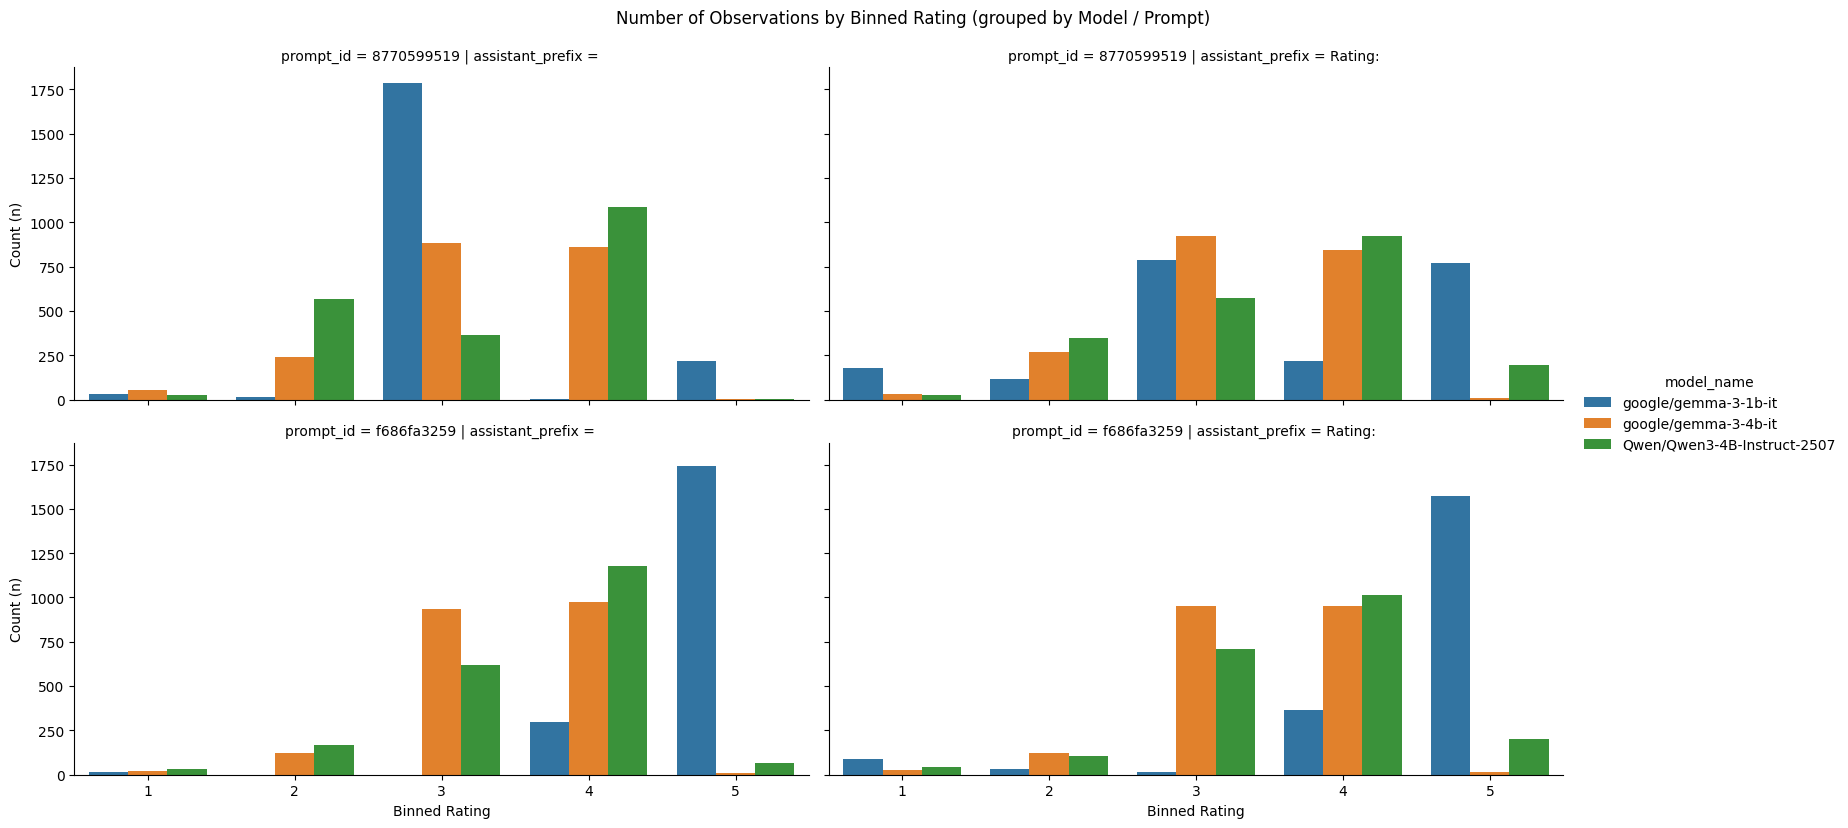

In [20]:
df_plot = df.copy()

kpi_col = 'apps_after_7_days'
rating_col = 'mode_rating'

# Bin ratings
df_plot['rating_bin'] = df_plot[rating_col].round()

# Ensure all bins appear (even if some combos are missing)
bins = np.arange(int(df_plot['rating_bin'].min()), int(df_plot['rating_bin'].max()) + 1)
df_plot['rating_bin'] = pd.Categorical(df_plot['rating_bin'], categories=bins, ordered=True)

# --- 2. Count Plot (number of observations) ---
g = sns.catplot(
    data=df_plot,
    x='rating_bin',
    hue='model_name',
    col='assistant_prefix',
    row='prompt_id',
    kind='count',          # <-- counts observations per category
    height=4,
    aspect=2,
    legend_out=True,
    ci=None
)

# Axis labels and title
g.set_axis_labels('Binned Rating', 'Count (n)')
g.fig.suptitle('Number of Observations by Binned Rating (grouped by Model / Prompt)', y=1.03)


Below we visualise how many creators applied for a deal after 7 days, grouped by LLM rating (mode). We use $estimator=median$, since the mean is sensitive to outliers. We expect that a higher rating leads to more applications. 

Two interesting patterns emerge. For Qwen, the hypothesized pattern holds until $rating=4$. Deals with $rating=5$ has a lower median than $4$. 

Gemma is all over the place. For the naive prompt the nr of applicants can hardly be distinguished based on the rating. For the BARS style prompt it is irregular. 

_Moreover_, we see that the BARS prompt leads Qwen to rate almost every deal 5. This is a huge problem, and shows the sensitivity to prompt design. 

C:\Users\Wouter Barter\AppData\Local\Temp\ipykernel_11812\1927751139.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.catplot(


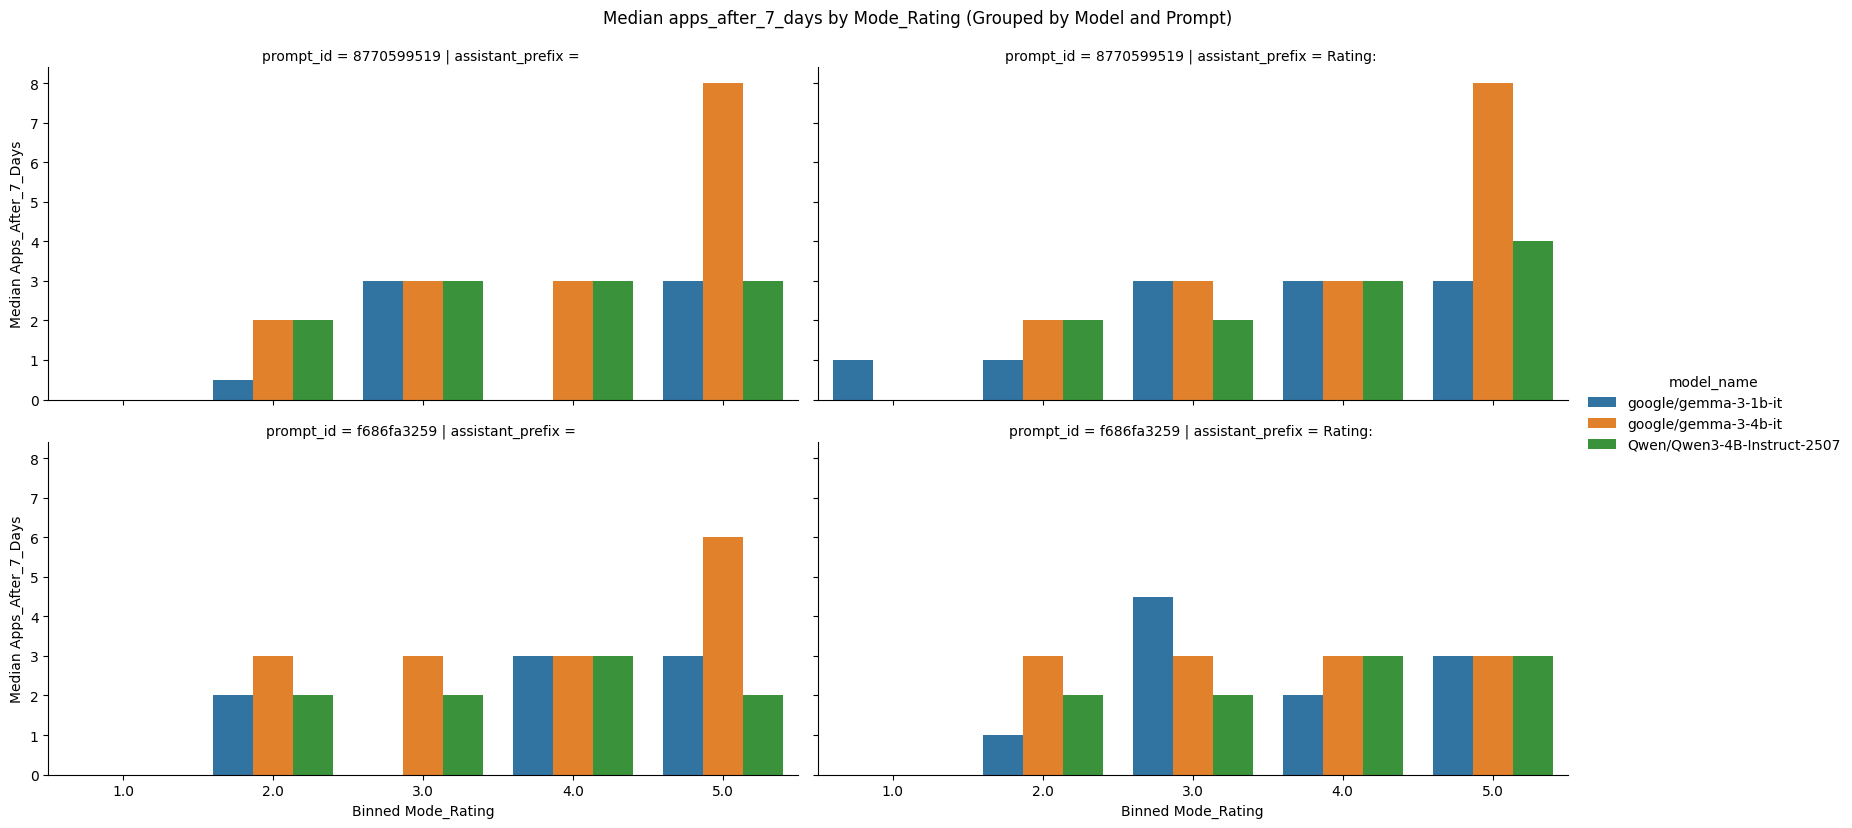

In [21]:
# --- 1. Prepare Data ---
# Create a copy to avoid modifying the original
df_plot = df.copy()

kpi_col = 'apps_after_7_days'
rating_col = 'mode_rating'

# Create the 'rating_bin' column by rounding the continuous rating
df_plot['rating_bin'] = df_plot[rating_col].round()

# --- 2. Create the Plot ---
# We use sns.catplot (Categorical Plot) as it's a high-level
# interface for creating faceted grids.
g = sns.catplot(
    data=df_plot,
    x='rating_bin',       # X-axis is your binned rating
    y=kpi_col,            # Y-axis is your KPI
    hue='model_name',        # This puts the models side-by-side in one plot
    col = 'assistant_prefix',
    row='prompt_id',       # This creates the separate plots for each prompt
    kind='bar',           # Specifies the plot type
    estimator=np.median,  # <-- FIX: Use median, which is robust to outliers
    height=4,             # Height of each individual facet
    aspect=2,             # Width-to-height ratio (makes it wider)
    ci=None,              # Turn off confidence intervals for a cleaner look
                            # (You can use 'sd' for standard deviation)
    legend_out=True,       # Puts the legend outside the plot
    # estimator = 'mode'
)

# --- 3. Tweak and Save ---
# Add a main title
g.fig.suptitle(
    f'Median {kpi_col} by {rating_col.title()} (Grouped by Model and Prompt)', # <-- FIX: Changed "Mean" to "Median"
    y=1.03 # Adjust title position
)

# Set labels for the axes
g.set_axis_labels(f'Binned {rating_col.title()}', f'Median {kpi_col.title()}') # <-- FIX: Changed "Mean" to "Median"



We consider using a Fixed Effects model of some sort, since we know that unobserved heterogeneity at the company level is very likely related to the evaluations. When applying a random effects (RE) model, we assume that the RE cluster variable is uncorrelated with the predictors. However, we might expect that companies with more baseline applicants also write better marketing copy. 

To analyse which models we can sensibly use, we need to consider whether we have sufficient observations per company. 

In [23]:
# (Assuming 'df' is your DataFrame)

# 1. Define the keys you will group by
my_group_keys = ['model_name', 'mode_rating', 'prompt_id', 'assistant_prefix']

# 2. Create your dictionary using these keys
rating_dict = {
    # k: v[['deal_id', 'deal_title', 'deal_text', 'model_name', 'mean_rating', 'applicants_applications_count']]
    k: pd.DataFrame(v.groupby('partner_id')['mean_rating'].std())
    for k, v in df.groupby(my_group_keys)
}

# 3. Call the viewer, passing the *same list*
create_interactive_viewer(rating_dict, my_group_keys)

--- Interactive DataFrame Viewer ---


mean_rating
partner_id             
3                   0.0
4                   NaN
126                 NaN
162                 NaN
173                 NaN
194                 NaN
204                 0.0
356                 NaN
418                 NaN
468                 0.0
514                 NaN
569                 NaN
627                 NaN
758                 NaN
871                 NaN
1319                NaN
1422                NaN
1530                NaN
2338                NaN
2369                NaN
2424                NaN

In [24]:
df[df['partner_id'] == 1405]

applicants_applications_count  \
7104                               6   
7105                               6   
7106                               6   
7107                               6   
7108                               6   
7109                               6   
7110                               6   
7111                               6   
7112                               6   
7113                               6   
7114                               6   
7115                               6   
13824                              1   
13825                              1   
13826                              1   
13827                              1   
13828                              1   
13829                              1   
13830                              1   
13831                              1   
13832                              1   
13833                              1   
13834                              1   
13835                              1   
21384                              4   
21385                              4   
21386                              4   
21387                              4   
21388                              4   
21389                              4   
21390                              4   
21391                              4   
21392                              4   
21393                              4   
21394                              4   
21395                              4   
24384                              0   
24385                              0   
24386                              0   
24387                              0   
24388                              0   
24389                              0   
24390                              0   
24391                              0   
24392                              0   
24393                              0   
24394                              0   
24395                              0   

                                           content_types  \
7104   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
7105   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
7106   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
7107   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
7108   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
7109   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
7110   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
7111   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
7112   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
7113   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
7114   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
7115   [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13824  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13825  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13826  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13827  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13828  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13829  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13830  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13831  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13832  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13833  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13834  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
13835  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
21384  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
21385  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
21386  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
21387  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
21388  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
21389  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
21390  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
21391  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
21392  [{'id': 40, 'name': 'Drinks', 'slug': 'Champag...   
21393 

In [25]:
df.groupby(experimental_groups+['partner_id'])['mean_rating']

In [ ]:
valc = raw_df['partner_id'].value_counts()

In [ ]:
valc[valc >3].sum() / valc.sum()

np.float64(0.5789473684210527)

In [ ]:
raw_df.groupby(['company_id', 'deal_id']).value_counts()

TypeError: unhashable type: 'numpy.ndarray'

# Feature engineering

In [27]:
df['first_content_type'] = df.content_types.apply(lambda x: x[0]['name'])

# Modeling KPI

In [37]:
EXPERIMENTAL_GROUPS = ['model_name', 'prompt_id', 'assistant_prefix']
CATEGORICAL_PREDICTORS = ['deal_type', 'first_content_type']
BINARY_PREDICTORS = ['accepts_international'] # Already 0/1 or T/F
NEW_PREDICTOR = 'mean_rating'
TARGET_COL = 'apps_after_7_days'
# df_model_full = df[df.accepted_countries_str == 'NLD'].copy()

df_model_full = df.copy()

In [38]:
df_model_full

applicants_applications_count  \
0                                 39   
1                                 39   
2                                 39   
3                                 39   
4                                 39   
...                              ...   
28015                              0   
28016                              0   
28017                              0   
28018                              0   
28019                              0   

                                           content_types  \
0      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
1      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
2      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
3      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
4      [{'id': 41, 'name': 'Activities', 'slug': 'per...   
...                                                  ...   
28015  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28016  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28017  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28018  [{'id': 41, 'name': 'Activities', 'slug': 'per...   
28019  [{'id': 41, 'name': 'Activities', 'slug': 'per...   

                                    deal_id  \
0      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
1      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
2      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
3      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
4      0196edc7-e6a8-00c8-6ff5-ea60fa3f2895   
...                                     ...   
28015  0198764b-df11-00c8-d371-43ce67123eee   
28016  0198764b-df11-00c8-d371-43ce67123eee   
28017  0198764b-df11-00c8-d371-43ce67123eee   
28018  0198764b-df11-00c8-d371-43ce67123eee   
28019  0198764b-df11-00c8-d371-43ce67123eee   

                                              main_image  \
0      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
1      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
2      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
3      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
4      uploads/deals/0196edc7-5969-ffff-6700-7ae699b8...   
...                                                  ...   
28015  uploads/deals/0198764b-df72-ffff-c9aa-3c5da406...   
28016  uploads/deals/0198764b-df72-ffff-c9aa-3c5da406...   
28017  uploads/deals/0198764b-df72-ffff-c9aa-3c5da406...   
28018  uploads/deals/0198764b-df72-ffff-c9aa-3c5da406...   
28019  uploads/deals/0198764b-df72-ffff-c9aa-3c5da406...   

       min_social_media_followers deal_tags                 live_since  \
0                            2500      None 2025-05-20 15:21:28.249567   
1                            2500      None 2025-05-20 15:21:28.249567   
2                            2500      None 2025-05-20 15:21:28.249567   
3                            2500      None 2025-05-20 15:21:28.249567   
4                            2500      None 2025-05-20 15:21:28.249567   
...                           ...       ...                        ...   
28015                        5000      None 2025-08-04 18:16:30.925280   
28016                        5000      None 2025-08-04 18:16:30.925280   
28017                        5000      None 2025-08-04 18:16:30.925280   
28018                        5000      None 2025-08-04 18:16:30.925280   
28019                        5000      None 2025-08-04 18:16:30.925280   

                      created_at                 updated_at deleted_at  ...  \
0     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
1     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
2     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
3     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
4     2025-05-20 13:00:23.080212 2025-10-28 10:55:34.719187        NaT  ...   
...                          ...                        ...        ...  ...   
28015 2025-08-04 18:15:40.561759 2025-10-28 10:51:25.405304        NaT  ...  

## OLS

In [39]:
# --- 3. Run flexible regression for each group ---

# Dictionary to store the fitted models
regression_results = {}

# Group by your experimental categories
grouped_data = df_model_full.groupby(EXPERIMENTAL_GROUPS)

print(f"Total groups to analyze: {len(grouped_data)}")

for group_name, group_df in grouped_data:
    print(f"\n--- Analyzing Group: {group_name} ---")

    # --- 1. Define predictors (X) ---
    
    # This list will hold all our predictor dataframes
    predictor_dfs = []
    
    # A. Add continuous/binary predictors (if any)
    # Combine the lists. If one is empty, this still works.
    numeric_predictors = [NEW_PREDICTOR] + BINARY_PREDICTORS
    
    if numeric_predictors: # Only add if the list is not empty
        X_numeric = group_df[numeric_predictors].copy()
        
        # --- FLEXIBLE CONVERSION ---
        # Convert all binary columns to int (if any exist)
        for col in BINARY_PREDICTORS:
            if col in X_numeric.columns:
                X_numeric[col] = X_numeric[col].astype(int)
                
        predictor_dfs.append(X_numeric)

    # B. Add categorical dummies (if any)
    if CATEGORICAL_PREDICTORS: # Only run if the list is not empty
        X_dummies = pd.get_dummies(
            group_df[CATEGORICAL_PREDICTORS], 
            drop_first=True, 
            dtype=int
        )
        predictor_dfs.append(X_dummies)

    # C. Check if we have any predictors at all
    if not predictor_dfs:
        print(f"Skipping group {group_name}: No predictors specified.")
        continue
        
    # D. Combine all predictor dataframes
    X_combined = pd.concat(predictor_dfs, axis=1)

    # --- 2. Add constant for intercept ---
    X = sm.add_constant(X_combined)

    # --- 3. Define dependent variable (y) ---
    y = group_df[TARGET_COL]
    
    # --- 4. Align and Drop NaNs ---
    final_data = pd.concat([y, X], axis=1).dropna()
    
    # --- 5. Check for sufficient data ---
    if len(final_data) < (X.shape[1] + 2):
        print(f"Skipping group {group_name}: Not enough observations after dropna.")
        continue

    # --- 6. Separate final data ---
    y_final = final_data[TARGET_COL]
    X_final = final_data.drop(columns=[TARGET_COL])

    # --- 7. Fit OLS regression ---
    try:
        model = sm.OLS(y_final, X_final).fit()
        regression_results[group_name] = model
        print(model.summary()) # Print summary for this "lab" phase
    except Exception as e:
        print(f"Could not fit model for group {group_name}: {e}")

print("\n--- Grouped regression complete. ---")

Total groups to analyze: 12

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', '') ---
                            OLS Regression Results                            
Dep. Variable:      apps_after_7_days   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     3.365
Date:                Tue, 25 Nov 2025   Prob (F-statistic):           2.28e-08
Time:                        10:34:59   Log-Likelihood:                -8634.4
No. Observations:                2047   AIC:                         1.732e+04
Df Residuals:                    2020   BIC:                         1.747e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
-----

In [40]:
view_statsmodels_summaries(regression_results)

--- Interactive Model Summary Viewer ---


Dropdown(description='Select Model Group:', layout=Layout(width='80%'), options=("('Qwen/Qwen3-4B-Instruct-250…

Output()

## Negative Binomial

In [41]:
regression_results = {} # Dictionary to store fitted models

# Group by your experimental categories
grouped_data = df_model_full.groupby(EXPERIMENTAL_GROUPS)

print(f"Total groups to analyze: {len(grouped_data)}")

for group_name, group_df in grouped_data:
    print(f"\n--- Analyzing Group: {group_name} ---")
    

    # --- 1. Define predictors (X) ---
    
    # This list will hold all our predictor dataframes
    predictor_dfs = []
    
    # A. Add continuous/binary predictors (if any)
    # Combine the lists. If one is empty, this still works.
    numeric_predictors = [NEW_PREDICTOR] + BINARY_PREDICTORS
    
    if numeric_predictors: # Only add if the list is not empty
        X_numeric = group_df[numeric_predictors].copy()
        
        # --- FLEXIBLE CONVERSION ---
        # Convert all binary columns to int (if any exist)
        for col in BINARY_PREDICTORS:
            if col in X_numeric.columns:
                X_numeric[col] = X_numeric[col].astype(int)
                
        predictor_dfs.append(X_numeric)

    # B. Add categorical dummies (if any)
    if CATEGORICAL_PREDICTORS: # Only run if the list is not empty
        X_dummies = pd.get_dummies(
            group_df[CATEGORICAL_PREDICTORS], 
            drop_first=True, 
            dtype=int
        )
        predictor_dfs.append(X_dummies)

    # C. Check if we have any predictors at all
    if not predictor_dfs:
        print(f"Skipping group {group_name}: No predictors specified.")
        continue

    # D. Combine all predictor dataframes
    X_combined = pd.concat(predictor_dfs, axis=1)

    # --- 2. Add constant for intercept ---
    X = sm.add_constant(X_combined)

    # --- 3. Define dependent variable (y) ---
    y = group_df[TARGET_COL]


    final_data = pd.concat([y, X], axis=1).dropna()

    if len(final_data) < (X.shape[1] + 2):
        print(f"Skipping group {group_name}: Not enough observations after filtering/dropna.")
        continue
        
    # 7. Separate into final y, X, and clusters
    y_final = final_data[TARGET_COL]
    X_final = final_data.drop(columns=[TARGET_COL])


    # 8. Fit NB model
    try:
        glm_model = sm.GLM(y_final, X_final, 
                           family=sm.families.NegativeBinomial())

        model = glm_model.fit()
        
        # Store the model object
        regression_results[group_name] = model
        

    except Exception as e:
        print(f"Could not fit model for group {group_name}: {e}")

print("\n--- Grouped regression complete. ---")

Total groups to analyze: 12

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', '') ---

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', 'Rating: ') ---

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', '') ---

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', 'Rating: ') ---

--- Analyzing Group: ('google/gemma-3-1b-it', '8770599519', '') ---


c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion para


--- Analyzing Group: ('google/gemma-3-1b-it', '8770599519', 'Rating: ') ---

--- Analyzing Group: ('google/gemma-3-1b-it', 'f686fa3259', '') ---

--- Analyzing Group: ('google/gemma-3-1b-it', 'f686fa3259', 'Rating: ') ---

--- Analyzing Group: ('google/gemma-3-4b-it', '8770599519', '') ---

--- Analyzing Group: ('google/gemma-3-4b-it', '8770599519', 'Rating: ') ---

--- Analyzing Group: ('google/gemma-3-4b-it', 'f686fa3259', '') ---


c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion para


--- Analyzing Group: ('google/gemma-3-4b-it', 'f686fa3259', 'Rating: ') ---

--- Grouped regression complete. ---


c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [42]:
view_statsmodels_summaries(regression_results)

--- Interactive Model Summary Viewer ---


Dropdown(description='Select Model Group:', layout=Layout(width='80%'), options=("('Qwen/Qwen3-4B-Instruct-250…

Output()

## Negative Binomial with Clustered Standard Errors

In [43]:
CLUSTER_COL = 'partner_id'

In [44]:
regression_results = {} # Dictionary to store fitted models

# Group by your experimental categories
grouped_data = df_model_full.groupby(EXPERIMENTAL_GROUPS)

print(f"Total groups to analyze: {len(grouped_data)}")

for group_name, group_df in grouped_data:
    # --- 1. Define predictors (X) ---
    
    # This list will hold all our predictor dataframes
    predictor_dfs = []
    
    # A. Add continuous/binary predictors (if any)
    # Combine the lists. If one is empty, this still works.
    numeric_predictors = [NEW_PREDICTOR] + BINARY_PREDICTORS
    
    if numeric_predictors: # Only add if the list is not empty
        X_numeric = group_df[numeric_predictors].copy()
        
        # --- FLEXIBLE CONVERSION ---
        # Convert all binary columns to int (if any exist)
        for col in BINARY_PREDICTORS:
            if col in X_numeric.columns:
                X_numeric[col] = X_numeric[col].astype(int)
                
        predictor_dfs.append(X_numeric)

    # B. Add categorical dummies (if any)
    if CATEGORICAL_PREDICTORS: # Only run if the list is not empty
        X_dummies = pd.get_dummies(
            group_df[CATEGORICAL_PREDICTORS], 
            drop_first=True, 
            dtype=int
        )
        predictor_dfs.append(X_dummies)

    # C. Check if we have any predictors at all
    if not predictor_dfs:
        print(f"Skipping group {group_name}: No predictors specified.")
        continue

    # D. Combine all predictor dataframes
    X_combined = pd.concat(predictor_dfs, axis=1)

    # --- 2. Add constant for intercept ---
    X = sm.add_constant(X_combined)

    # --- 3. Define dependent variable (y) ---
    y = group_df[TARGET_COL]
    
    all_final_data = pd.concat([y, X, group_df[CLUSTER_COL]], axis=1).dropna()

    if len(all_final_data) < (X.shape[1] + 2):
        print(f"Skipping group {group_name}: Not enough observations after filtering/dropna.")
        continue
        
    # 7. Separate into final y, X, and clusters
    y_final = all_final_data[TARGET_COL]
    X_final = all_final_data.drop(columns=[TARGET_COL, CLUSTER_COL])
    cluster_final = all_final_data[CLUSTER_COL] # The aligned cluster IDs


    # 8. Fit NB model with Cluster-Robust Standard Errors
    try:
        # Use sm.GLM (Generalized Linear Model)
        # Family=sm.families.NegativeBinomial() specifies the model type
        glm_model = sm.GLM(y_final, X_final, 
                           family=sm.families.NegativeBinomial())

        # Specify cov_type='cluster' and pass the cluster groups
        model = glm_model.fit(
            cov_type='cluster',
            cov_kwds={'groups': cluster_final}
        )
        
        # Store the model object
        regression_results[group_name] = model
        

    except Exception as e:
        print(f"Could not fit model for group {group_name}: {e}")

print("\n--- Grouped regression complete. ---")

Total groups to analyze: 12


c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion para


--- Grouped regression complete. ---


c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "
c:\Users\Wouter Barter\Documents\AI_thesis\venv312\Lib\site-packages\statsmodels\genmod\families\family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [45]:
view_statsmodels_summaries(regression_results)

--- Interactive Model Summary Viewer ---


Dropdown(description='Select Model Group:', layout=Layout(width='80%'), options=("('Qwen/Qwen3-4B-Instruct-250…

Output()

# GLMM/ Random Effects

In [47]:
# --- Define Your Variables ---

EXPERIMENTAL_GROUPS = ['model_name', 'prompt_id', 'assistant_prefix']
CATEGORICAL_PREDICTORS = ['deal_type', 'first_content_type']
BINARY_PREDICTORS = ['accepts_international'] # Already 0/1 or T/F
BINARY_PREDICTORS = []
NEW_PREDICTOR = 'mean_rating'
TARGET_COL = 'apps_after_7_days'
# df_model_full = df[df.accepted_countries_str == 'NLD'].copy()


CLUSTER_COL = 'partner_id'

Random effects model, with first content type (main content type) as categorical predictor (dummy-encoded), and a random company-specific effect. We see that mean_rating is significant, depending on assistant prefix. This means that there is an effect of mean_rating on the number of applications within 7 days. 

_However_, we must disentangle the effects. In this model, we assume the random effect is uncorrelated with the predictors, in this case mean_rating. The random effect captures the unobserved effect of "company" on nr of applications. Realistically, we may assume that $company$ and $mean\_rating$ are correlated: 
- company -> mean rating & company -> nr of applications
    - Rating the brand: LLM rating is not a mechanism, it is a symptom- the LLM captures company popularity, which is reflected in the nr of applications, but the better deal text does not $cause$ more applications. 
- company -> mean_rating:
    - 'high deal quality' companies write better marketing copy

In [48]:
import pandas as pd
import statsmodels.api as sm
import gpboost as gpb  
import numpy as np

# --- Model Fitting ---

regression_results = {} # Dictionary to store fitted models

# Group by your experimental categories
grouped_data = df_model_full.groupby(EXPERIMENTAL_GROUPS)

print(f"Total groups to analyze: {len(grouped_data)}")

for group_name, group_df in grouped_data:
    print(f"\n--- Analyzing Group: {group_name} ---")
    
    # --- 1. Define predictors (X) ---
    predictor_dfs = []
    
    # A. Add continuous/binary predictors
    numeric_predictors = [NEW_PREDICTOR] + BINARY_PREDICTORS
    numeric_predictors = [p for p in numeric_predictors if p] 
    
    if numeric_predictors:
        X_numeric = group_df[numeric_predictors].copy()
        for col in BINARY_PREDICTORS:
            if col in X_numeric.columns:
                X_numeric[col] = X_numeric[col].astype(int)
        predictor_dfs.append(X_numeric)

    # B. Add categorical dummies
    categorical_predictors = [p for p in CATEGORICAL_PREDICTORS if p] 
    if categorical_predictors:
        X_dummies = pd.get_dummies(
            group_df[categorical_predictors], 
            drop_first=True, 
            dtype=int
        )
        predictor_dfs.append(X_dummies)

    # C. Check for predictors
    if not predictor_dfs:
        print(f"Skipping group {group_name}: No predictors specified.")
        continue

    # D. Combine all predictor dataframes
    X_combined = pd.concat(predictor_dfs, axis=1)

    # --- 2. Add constant for intercept ---
    # We still use sm.add_constant for stats, but will drop it for gpboost
    X_with_const = sm.add_constant(X_combined, prepend=True)

    # --- 3. Define dependent variable (y) and cluster (groups) ---
    y = group_df[TARGET_COL]
    
    clusters = group_df[CLUSTER_COL]

    # --- 4. Combine ALL data and drop NAs ---
    final_data = pd.concat([y, X_with_const, clusters], axis=1).dropna().reset_index(drop=True)
    
    # Ensure cluster column is treated as a category for gpboost
    final_data[CLUSTER_COL] = final_data[CLUSTER_COL].astype('category')

    if len(final_data) < (X_with_const.shape[1] + 2):
        print(f"Skipping group {group_name}: Not enough observations after dropna.")
        continue
        
    # --- 5. Separate into final y, X_fixed, and groups ---
    y_final =  final_data[TARGET_COL].reset_index(drop=True)
    
    # **FIX 2: USE CATEGORICAL INTEGER CODES FOR GROUPS**
    # gpboost expects integer codes for its grouping variable, not strings.
    groups_final = final_data[CLUSTER_COL].astype('category').cat.codes.reset_index(drop=True)
    groups_final.name = str(CLUSTER_COL)
    
    # X_final for gpboost should NOT include the constant
    # Also reset its index and ensure numeric type for robustness
    X_final = final_data.drop(columns=[TARGET_COL, CLUSTER_COL]) \
                        .reset_index(drop=True) \
                        .astype(np.float32) # Cast to float32 for safety

    # --- 6. Fit NB-GLMM model using gpboost ---
    try:
        # 1. Create the GPModel. This defines the random effect structure
        #    and the likelihood (family).
        gp_model = gpb.GPModel(
            group_data=groups_final,
            likelihood="negative_binomial"
        )

        # 2. Fit the model
        #    We pass params={"std_dev": True} to get standard errors
        #    for the fixed effects (predictors)
        gp_model.fit(
            y=y_final,
            X=X_final,
            # params={"std_dev": True}
        )
        
        # 3. Get the summary and store it
        #    gp_model.summary() returns a string, which is perfect
        #    for storing or printing.
        # model_summary = gp_model.summary()
        # regression_results[group_name] = model_summary # Store the summary string
        regression_results[group_name] = gp_model
        
        print(f"Successfully fit model for group {group_name}.")
        # print(model_summary) # Uncomment to see summary for each group

    except Exception as e:
        print(f"Could not fit model for group {group_name}: {e}")

print("\n--- Grouped regression complete. ---")



Total groups to analyze: 12

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', '') ---
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', '').

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', 'Rating: ') ---
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', 'Rating: ').

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', '') ---
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', '').

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', 'Rating: ') ---
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', 'Rating: ').

--- Analyzing Group: ('google/gemma-3-1b-it', '8770599519', '') ---
Successfully fit model for group ('google/gemma-3-1b-it', '8770599519', '').

--- Analyzing Group: ('google/gemma-3-1b-it', '8770599519', 'Rating: ') ---
Successfully fit model for group ('google/gemma-3-1b-it', '8770599519', 'Rati

In [56]:
view_statsmodels_summaries(regression_results)

--- Interactive Model Summary Viewer ---


Dropdown(description='Select Model Group:', layout=Layout(width='80%'), options=("('Qwen/Qwen3-4B-Instruct-250…

Output()

We now fit another model, where add the mean rating per company, which is a 'rating' Fixed Effect on the company-level. We are essentially testing whether there is a between-company effect of 'deal quality'. This way, we can disentangle the true effect of deal quality from the correlation between company and deal quality. 

The significant result for $mean\_quality$ disappears, while the Fixed Effect is significant. Although the LLM rating measures something that is related to the number of applications, this does not necessarily reflect marketing copy quality. It is confounded by some latent trait that leads some companies to obtain more applications given their marketing copy- they may write better marketing copy quality, or the LLM measures brand popularity as well. We cannot be sure. 





In [57]:
regression_results = {} # Dictionary to store fitted models

# Group by your experimental categories
grouped_data = df_model_full.groupby(EXPERIMENTAL_GROUPS)

print(f"Total groups to analyze: {len(grouped_data)}")


for group_name, group_df in grouped_data:
    # --- 1. Define predictors (X) ---
    
    # This list will hold all our predictor dataframes
    predictor_dfs = []
    
    # A. Add continuous/binary predictors (if any)
    # Combine the lists. If one is empty, this still works.
    numeric_predictors = [NEW_PREDICTOR] + BINARY_PREDICTORS
    
    if numeric_predictors: # Only add if the list is not empty
        X_numeric = group_df[numeric_predictors].copy()
        
        # --- FLEXIBLE CONVERSION ---
        # Convert all binary columns to int (if any exist)
        for col in BINARY_PREDICTORS:
            if col in X_numeric.columns:
                X_numeric[col] = X_numeric[col].astype(int)
                
        predictor_dfs.append(X_numeric)

    # B. Add categorical dummies (if any)
    if CATEGORICAL_PREDICTORS: # Only run if the list is not empty
        X_dummies = pd.get_dummies(
            group_df[CATEGORICAL_PREDICTORS], 
            drop_first=True, 
            dtype=int
        )
        predictor_dfs.append(X_dummies)

    # C. Check if we have any predictors at all
    if not predictor_dfs:
        print(f"Skipping group {group_name}: No predictors specified.")
        continue

    # D. Combine all predictor dataframes
    X_combined = pd.concat(predictor_dfs, axis=1)

    # --- 2. Add constant for intercept ---
    X_with_const = sm.add_constant(X_combined)

    # --- 3. Define dependent variable (y) ---
    y = group_df[TARGET_COL]

    clusters = group_df[CLUSTER_COL]
    
    # --- 4. Combine ALL data and drop NAs ---
    
    # !! NEW STEP: Create the Mundlak (group-mean) variable !!
    # We must do this *before* dropping NAs to get the correct means


    # Calculate the mean of your key predictor, grouped by company
    group_df['mean_LLM_by_company'] = group_df.groupby(CLUSTER_COL)[NEW_PREDICTOR].transform('mean')

    
    # Define your full list of predictors, including the new one
    ALL_PREDICTOR_COLS = X_with_const.columns.tolist() + ['mean_LLM_by_company']
    
    # Now, combine ALL data and drop NAs
    final_data = pd.concat([y, X_with_const, clusters, group_df['mean_LLM_by_company']], axis=1).dropna()

    # if len(final_data) < (X_with_const.shape[1] + 3): # Added 1 for the new var
    #     print(f"Skipping group {group_name}: Not enough observations after dropna.")
    #     continue
        
    # --- 5. Separate into final y, X_fixed, and groups ---
    
    y_final = final_data[TARGET_COL].reset_index(drop=True).astype(int)
    
    groups_final = final_data[CLUSTER_COL].astype('category').cat.codes.reset_index(drop=True)
    groups_final.name = str(CLUSTER_COL) 
    
    # X_final now includes your original predictors AND the new mean variable
    # We still drop the constant, cluster col, and target col
    X_final = final_data.drop(columns=[TARGET_COL, CLUSTER_COL, 'const']) \
                        .reset_index(drop=True) \
                        .astype(np.float32)

    # --- 6. Fit NB-GLMM model (The rest of the code is identical) ---
    try:
        gp_model = gpb.GPModel(
            group_data=groups_final,
            likelihood="negative_binomial"
        )
        gp_model.fit(
            y=y_final, 
            X=X_final
        )
        
        model_summary = gp_model
        regression_results[group_name] = model_summary
        
        print(f"Successfully fit model for group {group_name}.")
        # print(model_summary) # IMPORTANT: Now print this to check!

    except Exception as e:
        print(f"Could not fit model for group {group_name}: {e}")

Total groups to analyze: 12
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', '').
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', 'Rating: ').
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', '').
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', 'Rating: ').
Successfully fit model for group ('google/gemma-3-1b-it', '8770599519', '').
Successfully fit model for group ('google/gemma-3-1b-it', '8770599519', 'Rating: ').
Successfully fit model for group ('google/gemma-3-1b-it', 'f686fa3259', '').
Successfully fit model for group ('google/gemma-3-1b-it', 'f686fa3259', 'Rating: ').
Successfully fit model for group ('google/gemma-3-4b-it', '8770599519', '').
Successfully fit model for group ('google/gemma-3-4b-it', '8770599519', 'Rating: ').
Successfully fit model for group ('google/gemma-3-4b-it', 'f686fa3259', '').
Successfully fit model for group ('google/gemma-3-4b-it',

In [51]:
view_statsmodels_summaries(regression_results)

--- Interactive Model Summary Viewer ---


Dropdown(description='Select Model Group:', layout=Layout(width='80%'), options=("('Qwen/Qwen3-4B-Instruct-250…

Output()

In [52]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import gpboost as gpb
from scipy.stats import norm

regression_results = {}

grouped_data = df_model_full.groupby(EXPERIMENTAL_GROUPS)


for group_name, group_df in grouped_data:
    print(f"\n--- Analyzing Group: {group_name} ---")

    # 1) Build X
    predictor_dfs = []
    numeric_predictors = [NEW_PREDICTOR] + BINARY_PREDICTORS
    numeric_predictors = [p for p in numeric_predictors if p] 


    if numeric_predictors:
        X_numeric = group_df[numeric_predictors].copy()
        for col in BINARY_PREDICTORS:
            if col in X_numeric.columns:
                X_numeric[col] = X_numeric[col].astype(int)
        predictor_dfs.append(X_numeric)


    # B. Add categorical dummies (if any)
    categorical_predictors = [p for p in CATEGORICAL_PREDICTORS if p] 
    if CATEGORICAL_PREDICTORS: # Only run if the list is not empty
        X_dummies = pd.get_dummies(
            group_df[CATEGORICAL_PREDICTORS], 
            drop_first=True, 
            dtype=int
        )
        predictor_dfs.append(X_dummies)

    if not predictor_dfs:
        print(f"Skipping group {group_name}: No predictors specified.")
        continue

    # D. Combine all predictor dataframes
    X_combined = pd.concat(predictor_dfs, axis=1)

    # --- 2. Add constant for intercept ---
    X_with_const = sm.add_constant(X_combined)

    # --- 3. Define dependent variable (y) ---
    y = group_df[TARGET_COL]

    clusters = group_df[CLUSTER_COL]

    # 4) Combine & drop NA
    final_data = pd.concat([y, X_with_const, clusters.rename(CLUSTER_COL)], axis=1).dropna().reset_index(drop=True)
    
    # Ensure cluster column is treated as a category for gpboost
    final_data[CLUSTER_COL] = final_data[CLUSTER_COL].astype('category')


    # 5) Final pieces
    y_final = final_data[TARGET_COL].astype(int).reset_index(drop=True)
    groups_final = final_data[CLUSTER_COL].cat.codes.astype(np.int32).reset_index(drop=True)
    groups_final.name = str(CLUSTER_COL)
    
    X_final = final_data.drop(columns=[TARGET_COL, CLUSTER_COL]).reset_index(drop=True).astype(np.float64)

    # 6) Fit NB-GLMM (try NB2 first; switch to 'negative_binomial_1' if preferred)
    # try:
    gp_model = gpb.GPModel(group_data=groups_final, likelihood="negative_binomial")
    gp_model.fit(y=y_final, X=X_final)  # std errors fetched via get_coef

        
    model_summary = gp_model
    regression_results[group_name] = model_summary
    print(f"Successfully fit model for group {group_name}.")


    # except Exception as e:
    #     print(f"Could not fit model for group {group_name}: {e}")



--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', '') ---
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', '').

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', 'Rating: ') ---
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', '8770599519', 'Rating: ').

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', '') ---
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', '').

--- Analyzing Group: ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', 'Rating: ') ---
Successfully fit model for group ('Qwen/Qwen3-4B-Instruct-2507', 'f686fa3259', 'Rating: ').

--- Analyzing Group: ('google/gemma-3-1b-it', '8770599519', '') ---
Successfully fit model for group ('google/gemma-3-1b-it', '8770599519', '').

--- Analyzing Group: ('google/gemma-3-1b-it', '8770599519', 'Rating: ') ---
Successfully fit model for group ('google/gemma-3-1b-it', '8770599519', 'Rating: ').

--- Analyzing Group

In [53]:
regression_results[('Qwen/Qwen3-4B-Instruct-2507','8770599519','')].summary()

Model summary:
Nb. observations: 2047
Nb. groups: 1039 (partner_id)
 Log-lik      AIC      BIC
-5915.01 11884.02 12035.87
-----------------------------------------------------
Covariance parameters (random effects):
            Param.
partner_id  0.4452
-----------------------------------------------------
Linear regression coefficients (fixed effects):
                                   Param.  Std. err.  z value  P(>|z|)
const                              1.2759     0.2236   5.7070   0.0000
mean_rating                        0.1177     0.0539   2.1813   0.0292
deal_type_physical                -0.1832     0.1070  -1.7123   0.0868
first_content_type_Animals         0.0620     0.4774   0.1299   0.8966
first_content_type_Beauty          0.6470     0.2006   3.2254   0.0013
first_content_type_Cars           -0.9362     0.5650  -1.6569   0.0975
first_content_type_Cooking         0.1516     0.2633   0.5760   0.5646
first_content_type_Drinks          0.2623     0.2800   0.9365   0.3490
first

In [54]:
view_statsmodels_summaries(regression_results)


--- Interactive Model Summary Viewer ---


Dropdown(description='Select Model Group:', layout=Layout(width='80%'), options=("('Qwen/Qwen3-4B-Instruct-250…

Output()

-------

ChatGPT solution GPBoost

In [55]:
import itertools
import gpboost as gpb
import pandas as pd
import numpy as np

EXPERIMENTAL_GROUPS = ['model_name', 'prompt_id', 'assistant_prefix']
CATEGORICAL_PREDICTORS = ['deal_type', 'first_content_type']
BINARY_PREDICTORS = ['accepts_international']
NEW_PREDICTOR = 'mean_rating'
TARGET_COL = 'apps_after_7_days'
CLUSTER_COL = 'partner_id'

df_model_full = df[df.accepted_countries_str == 'NLD'].copy()

group_combos = (
    df_model_full[EXPERIMENTAL_GROUPS]
    .drop_duplicates()
    .to_dict('records')
)



AttributeError: 'DataFrame' object has no attribute 'accepted_countries_str'

In [ ]:
results = []

regression_results = {}

for combo in group_combos:
    subset = df_model_full.copy()
    for k, v in combo.items():
        subset = subset[subset[k] == v]
    if subset.empty or subset[CLUSTER_COL].nunique() < 2:
        continue  # skip degenerate cases

    # Prepare design matrices
    X = pd.get_dummies(
        subset[CATEGORICAL_PREDICTORS + BINARY_PREDICTORS + [NEW_PREDICTOR]],
        drop_first=True
    ).astype(float)
    X.insert(0, "intercept", 1.0)

    y = subset[TARGET_COL].values
    cluster = subset[CLUSTER_COL].values

    # Random effect structure
    gp_model = gpb.GPModel(
        group_data=cluster,
        likelihood="negative_binomial"  # or "negative_binomial"
    )

    gp_model.fit(y=y, X=X)

    regression_results[str(combo)] = gp_model



In [ ]:
view_statsmodels_summaries(regression_results)


--- Interactive Model Summary Viewer ---


Dropdown(description='Select Model Group:', layout=Layout(width='80%'), options=("{'model_name': 'google/gemma…

Output()

In [ ]:
X.drop(columns=['mean_rating'])

intercept  accepts_international  deal_type_physical  \
0            1.0                    0.0                 1.0   
8            1.0                    0.0                 0.0   
16           1.0                    0.0                 0.0   
32           1.0                    0.0                 1.0   
40           1.0                    0.0                 0.0   
...          ...                    ...                 ...   
15944        1.0                    0.0                 0.0   
15960        1.0                    0.0                 1.0   
15968        1.0                    0.0                 0.0   
15976        1.0                    0.0                 0.0   
15984        1.0                    0.0                 1.0   

       first_content_type_Animals  first_content_type_Beauty  \
0                             0.0                        0.0   
8                             0.0                        0.0   
16                            0.0                        0.0   
32                            0.0                        0.0   
40                            0.0                        0.0   
...                           ...                        ...   
15944                         0.0                        0.0   
15960                         0.0                        0.0   
15968                         0.0                        0.0   
15976                         0.0                        0.0   
15984                         0.0                        0.0   

       first_content_type_Cars  first_content_type_Cooking  \
0                          0.0                         0.0   
8                          0.0                         0.0   
16                         0.0                         0.0   
32                         0.0                         0.0   
40                         0.0                         0.0   
...                        ...                         ...   
15944                      0.0                         0.0   
15960                      0.0                         0.0   
15968                      0.0                         0.0   
15976                      0.0                         0.0   
15984                      0.0                         0.0   

       first_content_type_Drinks  first_content_type_Entertainment  \
0                            0.0                               0.0   
8                            0.0                               0.0   
16                           0.0                               0.0   
32                           0.0                               0.0   
40                           0.0                               0.0   
...                          ...                               ...   
15944                        0.0                               0.0   
15960                        0.0                               0.0   
15968                        0.0                               0.0   
15976                        1.0                               0.0   
15984                        0.0                               0.0   

       first_content_type_Experiences  ...  first_content_type_Music  \
0                                 0.0  ...                       0.0   
8                                 0.0  ...                       0.0   
16                                0.0  ...                       0.0   
32                                0.0  ...                       0.0   
40                                0.0  ...                       0.0   
...                               ...  ...                       ...   
15944                             0.0  ...                       0.0   
15960                             0.0  ...                       0.0   
15968                             0.0  ...                       0.0   
15976                             0.0  ...                       0.0   
15984                             0.0  ...                       0.0   

       first_content_type_Nigh

In [ ]:
results = []

regression_results = {}

for combo in group_combos:
    subset = df_model_full.copy()
    for k, v in combo.items():
        subset = subset[subset[k] == v]
    if subset.empty or subset[CLUSTER_COL].nunique() < 2:
        continue  # skip degenerate cases

    # Prepare design matrices
    X = pd.get_dummies(
        subset[CATEGORICAL_PREDICTORS + BINARY_PREDICTORS + [NEW_PREDICTOR]],
        drop_first=True
    ).astype(float)
    X.insert(0, "intercept", 1.0)

    X['mean_LLM_by_company'] = subset.groupby(CLUSTER_COL)[NEW_PREDICTOR].transform('mean')
    X['rating_within'] = X[NEW_PREDICTOR] - X['mean_LLM_by_company']
    X.drop(columns=['mean_rating'], inplace = True)


    y = subset[TARGET_COL].values
    cluster = subset[CLUSTER_COL].values

    # Random effect structure
    gp_model = gpb.GPModel(
        group_data=cluster,
        likelihood="negative_binomial"  # or "negative_binomial"
    )

    gp_model.fit(y=y, X=X)

    regression_results[str(combo)] = gp_model



In [ ]:
view_statsmodels_summaries(regression_results)

--- Interactive Model Summary Viewer ---


Dropdown(description='Select Model Group:', layout=Layout(width='80%'), options=("{'model_name': 'google/gemma…

Output()